In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2


In [2]:
# Load the VOC dataset
voc_ds, voc_ds_info = tfds.load('voc', split='validation', shuffle_files=True, with_info=True)

voc_ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'labels': Sequence(ClassLabel(shape=(), dtype=int64, num_classes=20)),
    'labels_no_difficult': Sequence(ClassLabel(shape=(), dtype=int64, num_classes=20)),
    'objects': Sequence({
        'bbox': BBoxFeature(shape=(4,), dtype=float32),
        'is_difficult': bool,
        'is_truncated': bool,
        'label': ClassLabel(shape=(), dtype=int64, num_classes=20),
        'pose': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
})

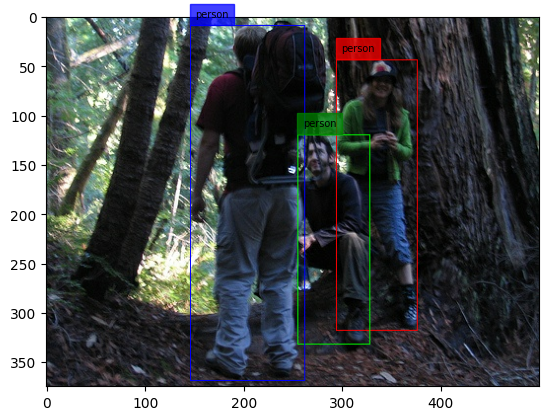

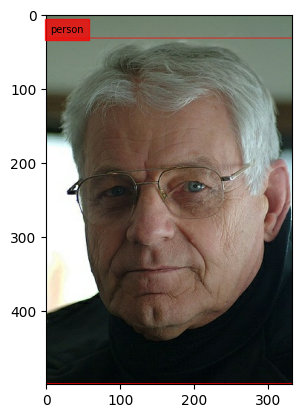

In [3]:
# class_names = array(['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car',
#        'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
#        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'],
#       dtype='<U11')
class_names = np.array(voc_ds_info.features['labels'].names)

# Input image and bounding boxes and tensors
# tensor of image.shape = (height, width, channels)
# tensor of boxes.shape = (number of bounding boxes, [y_min, x_min, y_max, x_max]])
#@param colors are (red, green, blue) in RBG format
def add_bounding_box_to_image(image, boxes,colors = np.array([[255., 0.0, 0.0], [0.0, 255.0, 0.0], [0.0, 0.0, 255.0]])):
    # [None, :] adds a batch dimension
    image_batched = image[None, :]

    boxes_batched  = boxes[None, :]

    bounded_image = tf.image.draw_bounding_boxes(image_batched.numpy(),boxes_batched.numpy(), colors)

    # Convert bounded_image from float to integer for matplotlib
    bounded_image = tf.cast(bounded_image, tf.uint8)

    # Remove batch dimension from bounded_image
    bounded_image = bounded_image[0]

    return bounded_image


def add_bounding_box_labels_to_matplotlib_axis(matplt_axis,image_height, image_width, box_labels, boxes,
                                      class_names,
                                      colors= np.array([[255., 0.0, 0.0], [0.0, 255.0, 0.0], [0.0, 0.0, 255.0]])):
    label_index = 0
    for box in boxes:
        # Get top left corner of bounding box
        top_left_y = box[0].numpy() * image_height # box[0] is y_min
        top_left_x = box[1].numpy() * image_width # box[1] is x_min

        # Get label for particular bounding box
        bbox_label_name_int = box_labels[label_index]

        # Convert label from int to string
        bbox_label_name_str = str(class_names[bbox_label_name_int])

        label_colors = ['red', 'green', 'blue']
        # Cycle through colors every third box
        label_color = label_colors[label_index % 3]

        # Add label to image with offset for alignment
        axis_text = matplt_axis.text(x= top_left_x + 4, y = top_left_y - 10,
                            s=bbox_label_name_str, fontsize=7, color='black')
        # Add background box to label text
        axis_text.set_bbox(dict(facecolor=label_color, alpha = 0.75, edgecolor=label_color))

        label_index += 1

    return




'''
    Main loop
'''

counter = 0 # For debugging

bbox_list = []
# label_list = []
# image_list = []

for item in voc_ds:

    image_with_bboxes = add_bounding_box_to_image(item['image'], item['objects']['bbox'])

    fig, ax = plt.subplots()

    # voc tfds box format = [y_min, x_min, y_max, x_max] scaled from 0 to 1 based on image size
    # boxes.shape = (number of bounding boxes, [y_min, x_min, y_max, x_max]])
    boxes  = item['objects']['bbox']
    # shape = (number of bounding boxes,), each label is an integer
    bbox_labels = item['objects']['label'] 

    image_width = item['image'].shape[1]
    image_height = item['image'].shape[0]

    add_bounding_box_labels_to_matplotlib_axis( ax, image_height,
                                      image_width,bbox_labels,
                                      boxes, class_names)

    plt.imshow(image_with_bboxes.numpy())
    plt.show()

    counter += 1

    if counter == 2:
        break
                             

Get instances of potted plants only

labels.shape =  (3,)
labels.shape =  (1,)
labels.shape =  (1,)
labels.shape =  (1,)
labels.shape =  (3,)
labels.shape =  (1,)
labels.shape =  (1,)
labels.shape =  (3,)
labels.shape =  (1,)
labels.shape =  (1,)
labels.shape =  (1,)
labels.shape =  (1,)
labels.shape =  (2,)
labels.shape =  (1,)
labels.shape =  (1,)
labels.shape =  (10,)
labels.shape =  (1,)
labels.shape =  (3,)
labels.shape =  (3,)
labels.shape =  (3,)
labels.shape =  (1,)
labels.shape =  (1,)
labels.shape =  (2,)
labels.shape =  (2,)
labels.shape =  (1,)
labels.shape =  (1,)
labels.shape =  (1,)
labels.shape =  (1,)
labels.shape =  (1,)
labels.shape =  (2,)
labels.shape =  (2,)
labels.shape =  (15,)
labels.shape =  (2,)
labels.shape =  (7,)
label_name_strs =  ['chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'pottedplant']


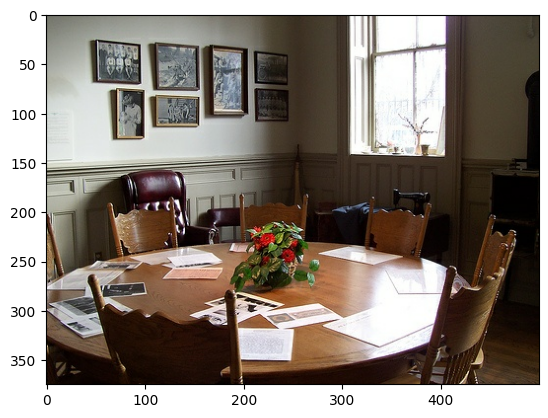

In [20]:
# class_names = array(['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car',
#        'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
#        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'],
#       dtype='<U11')
VOC_CLASS_NAMES = np.array(voc_ds_info.features['labels'].names)

# count number of instances that are in potterplant class

potted_plate_count = 0


# TODO: create x_train and y_train from voc_ds

# prevent all instances being displayed for testing
counter = 0
for item in voc_ds:


    label_index = 0
    # label for each bounding box in image
    label_name_strs = []



    for label_int in item['objects']['label']:

        # Get label for particular bounding box
        # bbox_label_name_int = VOC_CLASS_NAMES[label]

        # Convert label from int to string
        bbox_label_name_str = str(VOC_CLASS_NAMES[label_int])
        # print(f"(bbox_label_name_str, label_int) = ({bbox_label_name_str}, {int(label_int)})")

        # label_colors = ['red', 'green', 'blue']
        # Cycle through colors every third box
        # label_color = label_colors[label_index % 3]
        label_name_strs.append(bbox_label_name_str)

        # # Add label to image with offset for alignment
        # axis_text = matplt_axis.text(x= top_left_x + 4, y = top_left_y - 10,
        #                     s=bbox_label_name_str, fontsize=7, color='black')
        # Add background box to label text
        # axis_text.set_bbox(dict(facecolor=label_color, alpha = 0.75, edgecolor=label_color))

        # label_index += 1

        # Display image with matplotlib

    if ('pottedplant' in label_name_strs):
        print("label_name_strs = ", label_name_strs)
        plt.imshow(item['image'].numpy())
        plt.show()

        # prevent all instances being displayed for testing
        counter += 1

    if counter >= 1:
        break

In [43]:
# class_names = array(['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car',
#        'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
#        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'],
#       dtype='<U11')
VOC_CLASS_NAMES = np.array(voc_ds_info.features['labels'].names)


# TODO: create x_train and y_train from voc_ds

# Create lists for each label training attribute
bboxes_list = []
bbox_labels_int_list = []


# prevent all instances being displayed for testing
counter = 0
for item in voc_ds:

    labels = item['objects']['label']

    print("typeof(labels) = ", type(labels))
    print("labels = ", labels)
    print("labels.shape = ", labels.shape)
    print("lables[0] = ", labels[0])

    print(VOC_CLASS_NAMES[int(labels[0])])
    # plt.imshow(item['image'].numpy())
    # plt.show()

    # Get bounding boxes for items in image instance
    # where the items shape is (num_instances, bbox_coords = [ymin, xmin, ymax, xmax])
    # TODO ADD COMMENT ABOUT SCALE OF BBOX COORDS
    bboxes = item['objects']['bbox']

    print("typeof(bboxes) = ", type(bboxes))
    print("bboxes = ", bboxes)
    print("bboxes.shape = ", bboxes.shape)
    print("bboxes[0] = ", bboxes[0])

    bboxes_list.append(bboxes)

    # bboxes_list.append(item['objects']['bbox'])
    bbox_labels_int_list.append(labels)



    # prevent all instances being displayed for testing
    counter += 1

    if counter >= 5:
        break



'''
    TODO: Figure out way to get variable number of bboxes per instance
'''
# print("bboxes_list = ", bboxes_list)
# bboxes_list_tensor = tf.stack(bboxes_list)
# print("\r\nSTACKED TENSOR WHERE EACH INSTANCE HAS SAME NUMBER OF BBOXES :\r\n")
# print("bboxes_list_tensor = ", bboxes_list_tensor)
# print("bboxes_list_tensor.shape = ", bboxes_list_tensor.shape)

bbox_labels_int_tensor = tf.ragged.stack(bbox_labels_int_list)

print("\r\nRAGGED TENSOR WHERE EACH INSTANCE HAS VARIABLE NUMBER OF BBOX LABEL INTS :\r\n")
print("bbox_labels_int_tensor = ", bbox_labels_int_tensor)
print("bbox_labels_int_tensor.shape = ", bbox_labels_int_tensor.shape)

# y_train = tf.concat([bboxes_list_tensor, bbox_labels_int_tensor], axis=1)

# print("y_train = ", y_train)

# print()




typeof(labels) =  <class 'tensorflow.python.framework.ops.EagerTensor'>
labels =  tf.Tensor([18 18], shape=(2,), dtype=int64)
labels.shape =  (2,)
lables[0] =  tf.Tensor(18, shape=(), dtype=int64)
train
typeof(bboxes) =  <class 'tensorflow.python.framework.ops.EagerTensor'>
bboxes =  tf.Tensor(
[[0.25373134 0.162      0.71343285 0.576     ]
 [0.53432834 0.016      0.6686567  0.056     ]], shape=(2, 4), dtype=float32)
bboxes.shape =  (2, 4)
bboxes[0] =  tf.Tensor([0.25373134 0.162      0.71343285 0.576     ], shape=(4,), dtype=float32)
typeof(labels) =  <class 'tensorflow.python.framework.ops.EagerTensor'>
labels =  tf.Tensor([13 14], shape=(2,), dtype=int64)
labels.shape =  (2,)
lables[0] =  tf.Tensor(13, shape=(), dtype=int64)
motorbike
typeof(bboxes) =  <class 'tensorflow.python.framework.ops.EagerTensor'>
bboxes =  tf.Tensor(
[[0.416      0.072      0.672      0.46      ]
 [0.30933332 0.216      0.648      0.414     ]], shape=(2, 4), dtype=float32)
bboxes.shape =  (2, 4)
bboxes[0] =

### 

In [45]:
counter = 0 
for item in voc_ds:
    counter += 1
    print(type(item))
    if counter > 5:
        break

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


In [ ]:
def load_pascal_voc(split, dataset, bounding_box_format):
    ds = tfds.load(dataset, split=split, with_info=False, shuffle_files=True)
    ds = ds.map(
        lambda x: unpackage_raw_tfds_inputs(x, bounding_box_format=bounding_box_format),
        num_parallel_calls=tf.data.AUTOTUNE,
    )
    return ds


train_ds = load_pascal_voc(
    split="train", dataset="voc/2007", bounding_box_format="xywh"
)
eval_ds = load_pascal_voc(split="test", dataset="voc/2007", bounding_box_format="xywh")

train_ds = train_ds.shuffle(BATCH_SIZE * 4)

# Creating ragged dataset 
train_ds = train_ds.ragged_batch(BATCH_SIZE, drop_remainder=True)
eval_ds = eval_ds.ragged_batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
#   TODO: use transfer learning to get a back bone layer
# look how other people layers with outputs, and inputs with shapes etc

# see bookmakrs for more info